## Datan analysointi S2022 - Tehtävät kerta 6
**Muista** kirjoittaa alle omat tietosi.
**Opiskelijan nimi:**

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Sanni Kattilakoski'
student_id = 'AB5134'

# Aineisto ja esikäsittely
## Aineisto
Tehdään datalle tarvittava esikäsittely.
Aineisto on Telian osakekurssit vuodelta 2018. ts. kyseessä on aikasarjadata.

In [1]:
# Kirjastojen lataaminen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datan esikäsittely.
Luetaan aluksi data sellaisenaan, mikä ei tässä tehtävässä ole oikea ratkaisu, mutta saadaan kuitenkin jotakin
tietoa näytettyä DataFramessa.

In [2]:
import pandas as pd

# Asetetaan datalähde, josta data löytyy
url_src = "https://student.labranet.jamk.fi/~pelju/datanav_k22/topic6/data/telia2018.csv"

df = pd.read_csv(url_src)
df.head()

,,,,,,,,Date;Bid;Ask;Opening price;High price;Low price;Closing price;Average price;Total volume;Turnover;Trades;
2018-12-28;4,078;4,083;4,00;4,117;3,995;4,076;4,083;988115;4034300,94;1075;
2018-12-27;4,002;4,008;4,087;4,112;3,99;3,995;4,055;1195487;4848035,58;1377;
2018-12-21;4,123;4,125;4,12;4,143;4,043;4,122;4,10;919570;3770429,07;1096;
2018-12-20;4,169;4,174;4,151;4,186;4,119;4,163;4,162;941170;3917348,22;1036;
2018-12-19;4,183;4,186;4,17;4,213;4,17;4,18;4,191;651864;2732150,44;698;


### Luetaan tiedosto DataFrameen aikasarjana (T6.1 / 1p)
Luetaan tiedosto, mutta asetetaan tuotettavaan DataFrameen vain muutama sarake, jonka arvoista olemme kiinnostuneita.
Asetetaan `Date`-sarake DataFrame-taulukon indeksiksi, jolloin saamme päivämäärän indeksikentäksi.

Toteuta seuraavat kohdat tässä tehtävässä:
* parsi päivämääräkenttä `Date`-päivämäärämuotoon
* Aseta `Date`-kenttä DataFramen indeksisarakkeeksi ja poista `Date`-kenttä DataFramen sarakkeista
* Lopputuloksena DataFramessa on Date-indeksin lisäksi seuraavat sarakkeet: `Opening price, High price, Low price, Closing price, Total volume` eli poista muut sarakkeet jo tässä vaiheessa


In [3]:
# TODO: Toteuta tiedoston lukeminen annettujen alitehtävien mukaan.
df = pd.read_csv(url_src, sep= ';', decimal= ',', parse_dates=['Date'], dayfirst=True, index_col='Date')
df.index.name = None
df = df[['Opening price', 'High price', 'Low price', 'Closing price', 'Total volume']]

In [4]:
df

,Opening price,High price,Low price,Closing price,Total volume
2018-12-28,4.000,4.117,3.995,4.076,988115
2018-12-27,4.087,4.112,3.990,3.995,1195487
2018-12-21,4.120,4.143,4.043,4.122,919570
2018-12-20,4.151,4.186,4.119,4.163,941170
2018-12-19,4.170,4.213,4.170,4.180,651864
...,...,...,...,...,...
2018-01-08,3.850,3.860,3.824,3.845,2151101
2018-01-05,3.780,3.850,3.777,3.850,1306020
2018-01-04,3.760,3.786,3.756,3.780,1540541
2018-01-03,3.758,3.758,3.730,3.755,1823437


In [5]:
df.dtypes

Opening price    float64
High price       float64
Low price        float64
Closing price    float64
Total volume       int64
dtype: object

### Järjestetään tiedot (T6.2 / 1p)

Toteuta seuraavat kohdat tässä tehtävässä:
* Tulosta ensimmäiset kymmenen päivää `Date` arvon perusteella
* Tulosta tulokset järjestettynä  `Total volume`-kentän mukaan (suurin arvo ensimmäisenä).
* Luo myös uusi kenttä `High - Low`, joka sisältää korkeimman hinnan ja matalimman hinnan välisen erotuksen


In [6]:
# TODO: Tulosta ensimmäiset kymmenen päivää `Date` arvon perusteella
df.sort_index(ascending=True,inplace=True)
df = df.head(10)
df
# df.head(10)

,Opening price,High price,Low price,Closing price,Total volume
2018-01-02,3.750,3.752,3.718,3.729,1717521
2018-01-03,3.758,3.758,3.730,3.755,1823437
2018-01-04,3.760,3.786,3.756,3.780,1540541
2018-01-05,3.780,3.850,3.777,3.850,1306020
2018-01-08,3.850,3.860,3.824,3.845,2151101
2018-01-09,3.874,3.922,3.864,3.919,1970062
2018-01-10,3.920,3.920,3.857,3.871,2070130
2018-01-11,3.895,3.895,3.816,3.863,2735266
2018-01-12,3.874,3.874,3.813,3.827,2671044
2018-01-15,3.831,3.835,3.812,3.823,972911


In [7]:
# TODO: Tulosta tulokset järjestettynä  `Total volume`-kentän mukaan.

In [8]:
df2 = df.sort_values(by='Total volume', ascending=False)
df2

,Opening price,High price,Low price,Closing price,Total volume
2018-01-11,3.895,3.895,3.816,3.863,2735266
2018-01-12,3.874,3.874,3.813,3.827,2671044
2018-01-08,3.850,3.860,3.824,3.845,2151101
2018-01-10,3.920,3.920,3.857,3.871,2070130
2018-01-09,3.874,3.922,3.864,3.919,1970062
2018-01-03,3.758,3.758,3.730,3.755,1823437
2018-01-02,3.750,3.752,3.718,3.729,1717521
2018-01-04,3.760,3.786,3.756,3.780,1540541
2018-01-05,3.780,3.850,3.777,3.850,1306020
2018-01-15,3.831,3.835,3.812,3.823,972911


In [9]:
# TODO:  Luo myös uusi kenttä `High - Low` ja tulosta dataframe.

In [10]:
df2['High - Low'] = df2['High price'] - df2['Low price']
df2

,Opening price,High price,Low price,Closing price,Total volume,High - Low
2018-01-11,3.895,3.895,3.816,3.863,2735266,0.079
2018-01-12,3.874,3.874,3.813,3.827,2671044,0.061
2018-01-08,3.850,3.860,3.824,3.845,2151101,0.036
2018-01-10,3.920,3.920,3.857,3.871,2070130,0.063
2018-01-09,3.874,3.922,3.864,3.919,1970062,0.058
2018-01-03,3.758,3.758,3.730,3.755,1823437,0.028
2018-01-02,3.750,3.752,3.718,3.729,1717521,0.034
2018-01-04,3.760,3.786,3.756,3.780,1540541,0.030
2018-01-05,3.780,3.850,3.777,3.850,1306020,0.073
2018-01-15,3.831,3.835,3.812,3.823,972911,0.023


## Datan visualisointi  (T6.3 / 1p)

Toteuta seuraavat kohdat tässä tehtävässä:

Visualisoi aikasarjadata haluamallasi tavalla.
* Valitse tähän ainakin kaksi eri kuvaajatyyppiä
* Visualisoi data kenttien 'Low price' ja 'High price' avulla
* Visualisoi esim. käyttäen `rolling`-operaattorin antama tasaisesti painotettu sarja
* Visualisoi antaen *enemmän painoa* tuoreimmille havainnoille (`ewm` (exponentially weighted moving) -operaattori).
Tällainen sarja adaptoituu nopeammin muutoksiin kuin `rolling`-operaattorin antama tasaisesti painotettu sarja.


              Bid    Ask  Opening price  High price  Low price  Closing price  \
2018-01-02  3.730  3.735          3.750       3.752      3.718          3.729   
2018-01-03  3.740  3.743          3.758       3.758      3.730          3.755   
2018-01-04  3.783  3.785          3.760       3.786      3.756          3.780   
2018-01-05  3.829  3.833          3.780       3.850      3.777          3.850   
2018-01-08  3.835  3.838          3.850       3.860      3.824          3.845   

            Average price  Total volume    Turnover  Trades  Unnamed: 11  
2018-01-02          3.736       1717521  6416829.82    1128          NaN  
2018-01-03          3.747       1823437  6832311.86    1092          NaN  
2018-01-04          3.771       1540541  5808883.03     995          NaN  
2018-01-05          3.817       1306020  4985385.21     992          NaN  
2018-01-08          3.840       2151101  8260135.45    1598          NaN  


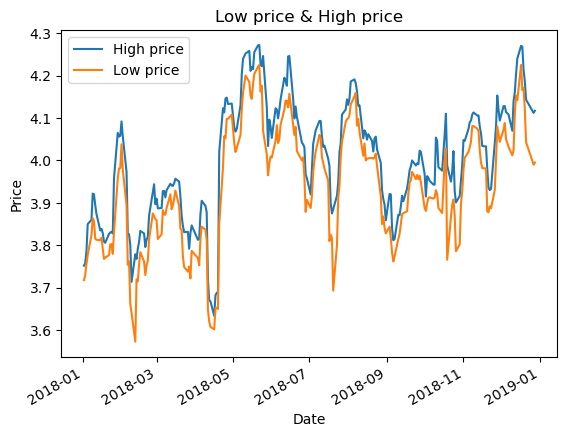

In [11]:
import matplotlib.pyplot as plt

df = pd.read_csv(url_src, sep= ';', decimal= ',', parse_dates=['Date'], dayfirst=True, index_col='Date')
df.index.name = None
df.sort_index(ascending=True,inplace=True)
print(df.head())

# TODO: Visualisoi data kenttien 'Low price' ja 'High price' avulla

df['High price'].plot()
df['Low price'].plot()
# plt.figure(figsize=(10,5))
plt.title('Low price & High price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

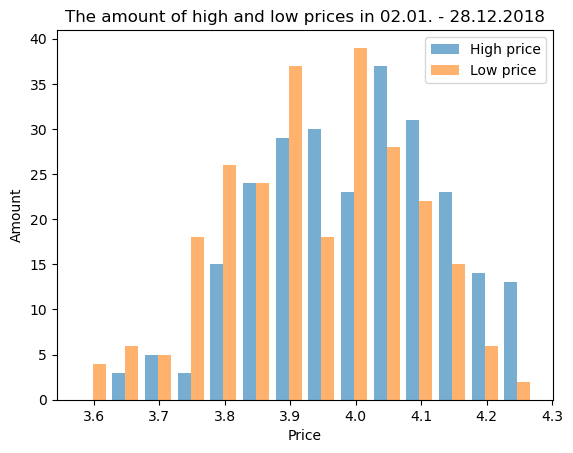

In [13]:
# from datetime import datetime

plt.hist([df['High price'], df['Low price']], alpha = 0.6, bins=14)
plt.title(f'The amount of high and low prices in {df.index[0].strftime("%d.%m.")} - {df.index[-1].strftime("%d.%m.%Y")}')
plt.xlabel('Price')
plt.ylabel('Amount')
plt.legend(['High price', 'Low price'])
plt.show()

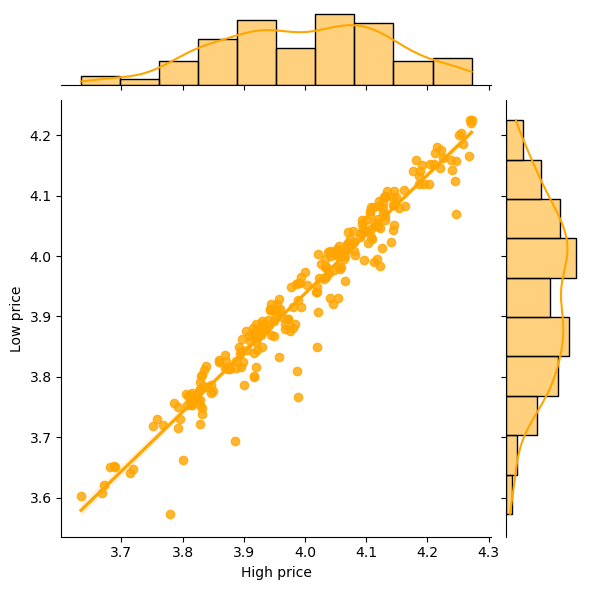

In [73]:
# plt.hist(x= df.index, y= df['High price'], alpha = 0.6, bins=14)
sns.jointplot(x='High price', y='Low price', data=df,  kind="reg", color='orange')
plt.show()

Kuvaaja, jossa on mukana Rolling window 20 päivän ajalta.

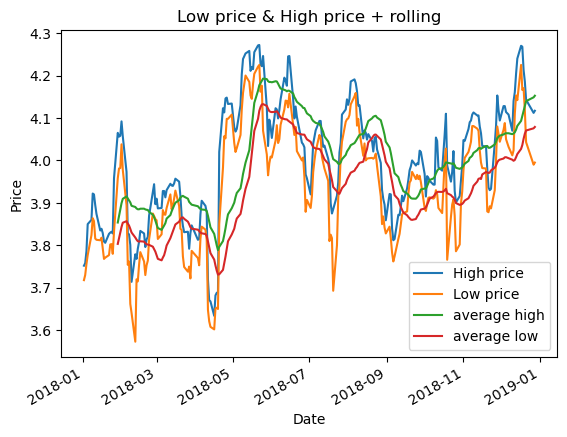

In [14]:
# TODO: Rolling Window operaattorin käyttö visualisoinnissa
df['High price'].plot()
df['Low price'].plot()
df['High price'].rolling(20).mean().plot(label='average high')
df['Low price'].rolling(20).mean().plot(label='average low')
plt.title(f'Low price & High price + rolling')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Tuoreempien havaintojen painottaminen

Usein käytetään menetelmiä, missä annetaan *enemmän painoa* tuoreimmille havainnoille.
Tällainen sarja adaptoituu nopeammin muutoksiin kuin `rolling`-operaattorin antama tasaisesti painotettu sarja.

`ewm` (*exponentially weighted moving*) -operaattori antaa tällaisen sarjan, span-parametri määrittää ikkunan koon.

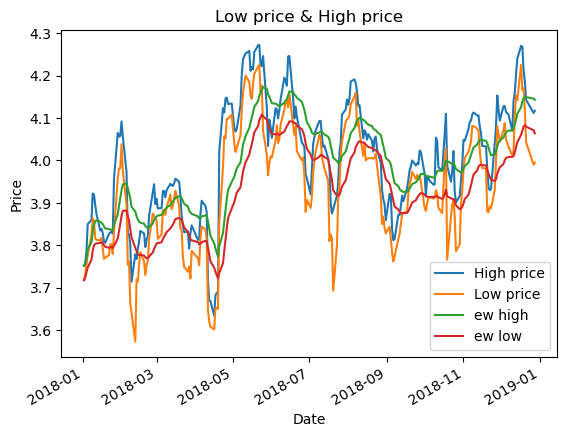

In [15]:
# TODO: ewn operaattorin käyttö visualisoinnissa
df['High price'].plot()
df['Low price'].plot()
df['High price'].ewm(span=20).mean().plot(label='ew high')
df['Low price'].ewm(span=20).mean().plot(label='ew low')
plt.title('Low price & High price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Outlierit ja korrelaatiot (T6.4 / 1p)

Toteuta seuraavat kohdat tässä tehtävässä:

* Datasta tulee tarkastaa ainakin jokaisen numeerisen sarakkeen merkittävät poikkeamat. Merkittävästi poikkeava arvo voidaan tarvittaessa korvata (millä tavalla?).
* Rivin poikkeamien havaitsemiseen voi käyttää `2%` ja `98%` prosenttipisteitä datasta
* laske myös **Pearsonin korrelaatiokerroin** sekä **selityskerroin**.

In [16]:
df = pd.read_csv(url_src, sep= ';', decimal= ',', parse_dates=['Date'], dayfirst=True, index_col='Date')
df.index.name = None
df.drop(['Unnamed: 11'], inplace=True, axis=1)

# TODO: laske poikkeamat (2% - 98%)
df.quantile([.02, .98], axis = 0)

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
0.02,3.65980,3.66472,3.66990,3.68996,3.64786,3.66766,3.67288,436855.86,1.768610e+06,480.98
0.98,4.23016,4.23216,4.22606,4.25506,4.18530,4.22612,4.21248,4989940.66,1.946405e+07,4835.64


**Merkittävästi poikkeava arvo** voidaan korvata tarvittaessa mm. keskiarvolla, mediaanilla, interpoloimalla tai poistamalla.

#### Korrelaatio

laske **Pearsonin korrelaatiokerroin** sekä **selityskerroin**.
Liitä mukaan myös Sanallinen tulkinta tuloksista.

#### Kahden muuttujan välinen riippuvuus
Kahden määrällisen muuttujan riippuvuutta tarkastellaan **hajontakaavion** ja **korrelaatiokertoimen** avulla.

#### Hajontakaavio
**Hajontakaavio** antaa nopea silmäyksen kahden muuttujan arvojen jakautumiseen.
* Yleensä ollaan kiinnostuneita liittyykö suuriin x:n arvoihin suuria tai pieniä y:n arvoja (korrelaatiota havaittavissa)
vai satunnaisia y:n arvoja (ei merkittävää korrelaatiota).


In [17]:
# TODO: Laske Opening price korrelaatio kenttään Closing price
print('Korrelaatiokerroin on ', df['Opening price'].corr(df['Closing price'])) 

Korrelaatiokerroin on  0.9520742596692894


**Pearsonin korrelaatiokerroin** kuvaa kahden muuttujan välistä korrelaatiota eli lineaarista riippuvuutta. Arvo on pienimillään -1, jolloin muuttujien välillä on täydellinen negatiivinen korrelaatio, ja suurimmillaan 1, jolloin kyseessä on täydellinen positiivinen korrelaatio.   

Opening pricen ja Closing pricen välisen korrelaatiokertoimen ollessa 0.9520742596692894, ollaan lähellä täydellistä positiivista korrelaatiota. Käytännössä tämä tarkoittaa sitä, että Opening price -arvon kasvaessa myös Closing price -arvo kasvaa samassa suhteessa.

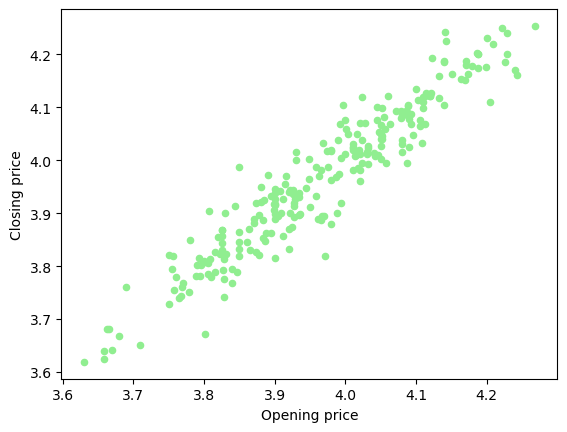

In [63]:
df.plot.scatter(x='Opening price', y='Closing price', color='lightgreen')
plt.show()

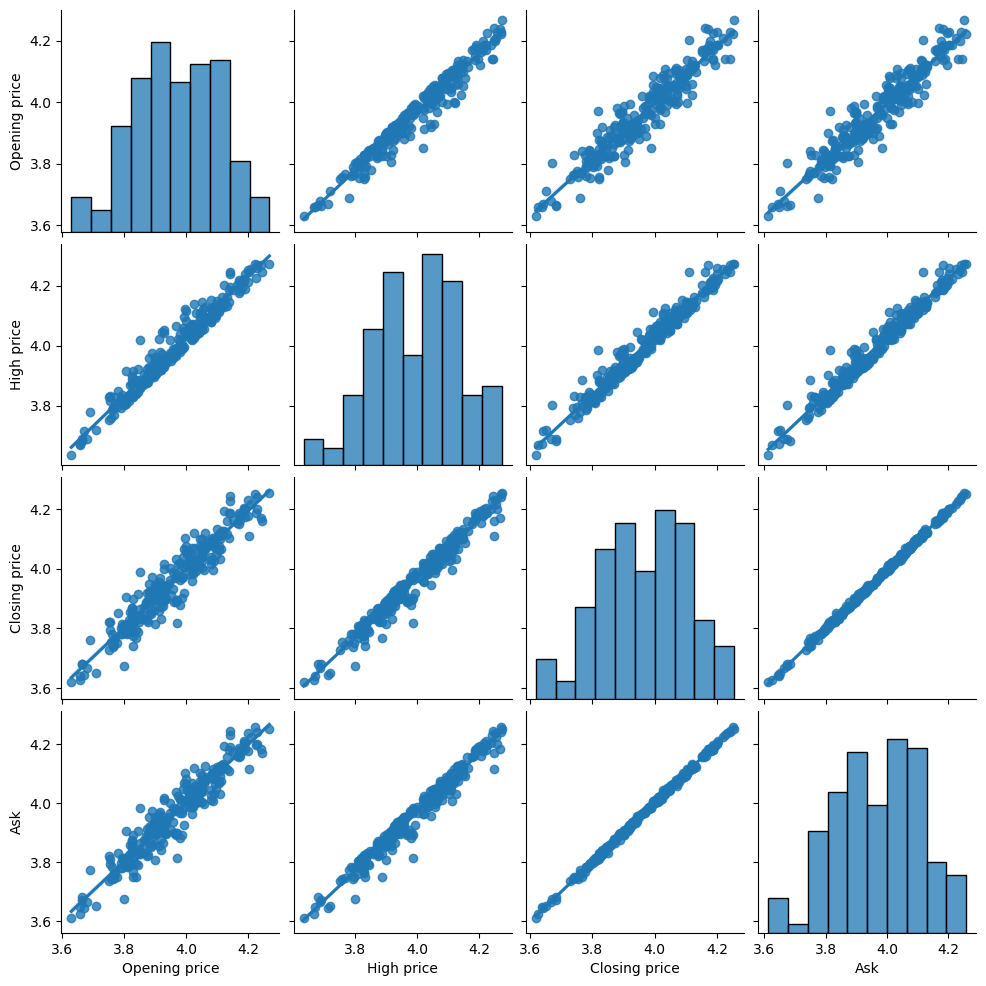

In [59]:
sns.pairplot(df[['Opening price', 'High price', 'Closing price', 'Ask']].dropna(), kind='reg')
# sns.color_palette("Set2")
plt.show()

In [21]:
# TODO: Laske Opening price korrelaatiot muihin kenttiin
df.corrwith(df['Opening price'])

Bid              0.953138
Ask              0.953027
Opening price    1.000000
High price       0.976568
Low price        0.974634
Closing price    0.952074
Average price    0.969014
Total volume    -0.365903
Turnover        -0.325045
Trades          -0.328774
dtype: float64

Ja vielä **Kaikkien luettujen** sarakkeiden väliset korrelaatiot

In [22]:
# TODO: Laske kaikkien kenttien korrelaatiot
df.corr().applymap("{:.2f}".format)

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Bid,1.00,1.00,0.95,0.98,0.98,1.00,0.99,-0.36,-0.32,-0.35
Ask,1.00,1.00,0.95,0.98,0.98,1.00,0.99,-0.36,-0.32,-0.35
Opening price,0.95,0.95,1.00,0.98,0.97,0.95,0.97,-0.37,-0.33,-0.33
High price,0.98,0.98,0.98,1.00,0.97,0.98,0.99,-0.31,-0.27,-0.28
Low price,0.98,0.98,0.97,0.97,1.00,0.98,0.99,-0.43,-0.39,-0.42
Closing price,1.00,1.00,0.95,0.98,0.98,1.00,0.99,-0.36,-0.32,-0.35
Average price,0.99,0.99,0.97,0.99,0.99,0.99,1.00,-0.37,-0.33,-0.36
Total volume,-0.36,-0.36,-0.37,-0.31,-0.43,-0.36,-0.37,1.00,1.00,0.94
Turnover,-0.32,-0.32,-0.33,-0.27,-0.39,-0.32,-0.33,1.00,1.00,0.94
Trades,-0.35,-0.35,-0.33,-0.28,-0.42,-0.35,-0.36,0.94,0.94,1.00


Selityskerroin

In [23]:
# TODO: Laske Selityskerroin
df.corr().applymap(lambda x:"{:.1%}".format(x**2))

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Bid,100.0%,100.0%,90.8%,96.4%,96.3%,99.8%,98.5%,13.2%,10.2%,12.0%
Ask,100.0%,100.0%,90.8%,96.4%,96.3%,99.8%,98.5%,13.3%,10.3%,12.2%
Opening price,90.8%,90.8%,100.0%,95.4%,95.0%,90.6%,93.9%,13.4%,10.6%,10.8%
High price,96.4%,96.4%,95.4%,100.0%,94.9%,96.2%,98.1%,9.6%,7.0%,7.6%
Low price,96.3%,96.3%,95.0%,94.9%,100.0%,96.1%,98.3%,18.3%,14.8%,17.4%
Closing price,99.8%,99.8%,90.6%,96.2%,96.1%,100.0%,98.2%,13.2%,10.2%,12.1%
Average price,98.5%,98.5%,93.9%,98.1%,98.3%,98.2%,100.0%,13.9%,10.8%,12.7%
Total volume,13.2%,13.3%,13.4%,9.6%,18.3%,13.2%,13.9%,100.0%,99.7%,88.5%
Turnover,10.2%,10.3%,10.6%,7.0%,14.8%,10.2%,10.8%,99.7%,100.0%,87.5%
Trades,12.0%,12.2%,10.8%,7.6%,17.4%,12.1%,12.7%,88.5%,87.5%,100.0%


**Selityskerroin** kuvaa sitä, kuinka hyvin yksi muuttuja selittää toista muuttujaa. Arvo on pienimillään 0, jolloin riippuvan 
muuttujan vaihtelu ei korreloi ollenkaan riippumattoman muuttujan kanssa, ja suurimmillaan 1, jolloin taas  riippuvan muuttujan vaihtelu voidaan selittää täydellisesti riippumattoman muuttujan avulla.   

Telian osakekurssi-datan osalta se tarkoittaa sitä, että esimerkiksi 96.2 % toteutuneen hinnan (Closing price) vaihteluista pystytään selittämään korkeimman hinnan (High price) vaihteluiden avulla. 

#### HeatMap

**HeatMap** on 2-ulotteinen matriisikuvio, joka antaa visualisoinnin numeerisista tiedoista solujen muodossa.
HeatMap-kartan värisävyt edustavat arvon suhdetta DataFrameen.

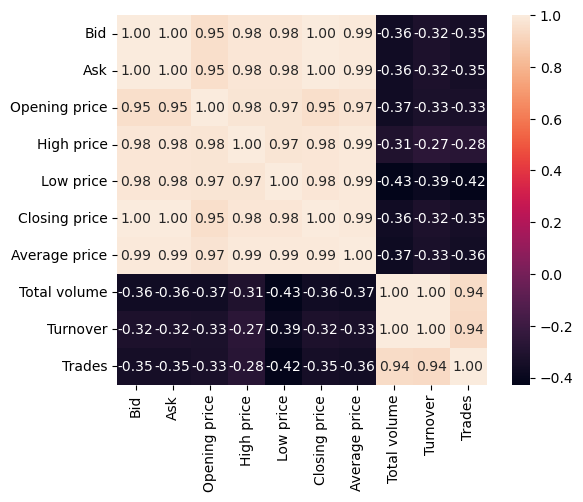

In [24]:
# TODO: visualisointi: Korrelaatiot ja/tai selityskertoimet HeatMap-kuviona
sns.heatmap(df.corr(), annot=True, fmt=".2f", square = True)
plt.show()

## Regressiomalli (T6.5 / 1p)

Toteuta seuraavat kohdat tässä tehtävässä:

* Rakenna datasta **Lineaarinen regressiomalli**
* Lineeaarinen malli riippuvuudelle saadaan tuomalla `sklearn.lineal_model`-kirjastosta `LinearRegression`-luokka
* Visualisointiin voi käyttää `seaborn`-kirjaston `regplot`-metodia

Jos on hyvä motivaatio tehdä lisää data-analytiikkaa, niin voit vielä miettiä seuraavaa kohtaa:
* Vapaahtoinen extratehtävä: Rakenna datasta joku toinen regressiomalli

#### RegPlot

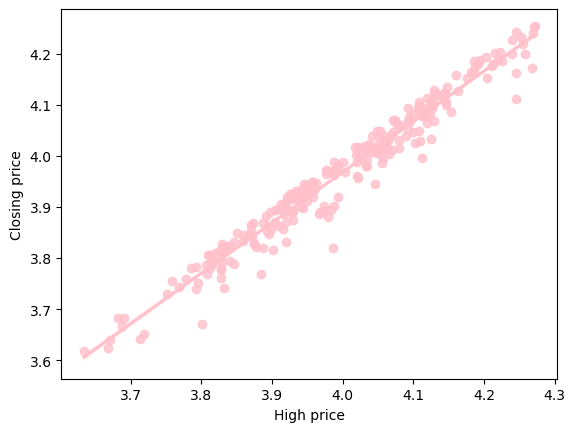

In [32]:
# TODO: Visualisointi regressiomallille
sns.regplot(x='High price', y='Closing price', data=df, color='pink')
plt.show()

#### Regressiomalli -  Lineaarinen malli riippuvuudelle

Lineeaarinen malli riippuvuudelle saadaan tuomalla `sklearn.lineal_model`-kirjastosta `LinearRegression`-luokka.
* valitse **selittävä muuttuja (x)** sekä **selitettävä muuttuja (y)**

In [53]:
from sklearn.linear_model import LinearRegression

# TODO: Regressiomalli: Lineaarinen malli valituille kentille.
malli=LinearRegression()
x = df['Opening price'].to_frame()  # muutetaan DataFrameksi
y = df['Closing price']
malli.fit(x,y)

LinearRegression()

In [54]:
print(malli.coef_)  # kulmakerroin
print(malli.intercept_) # vakiotermi
# TODO: Perustele myös valinta.

[0.98347863]
0.06486633817910548


In [55]:
#Selityskerroin
print(malli.score(x,y))

0.9064453959248252


96.19 % päättyvän arvon (Closing price) varianssista voidaan selittää High pricella.

[3.94960691 4.21514614]


C:\Users\sanni\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


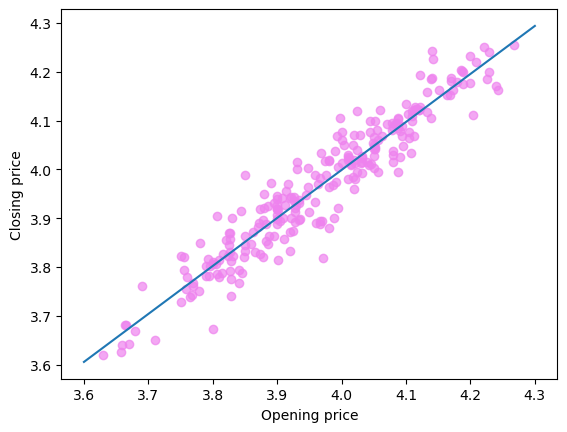

In [62]:
print(malli.predict([[3.95],[4.22]])) # High pricejä 3.95 ja 4.22 vastaavat Closing pricet

import numpy  as np

xfit = np.linspace(3.6,4.3,100) #100 arvoa tasavälein väliltä 3.6-4.3
Xfit = pd.DataFrame(xfit)
yfit = malli.predict(Xfit)
plt.scatter(x,y, color ='violet', alpha=0.7)
plt.plot(xfit,yfit)
plt.xlabel('Opening price')
plt.ylabel('Closing price')
plt.show()

## Lisätehtävä: Tulosanalyysi
Tulkitse vielä kaikki saamasi tulokset sanallisesti.
* aineisto
* esikäsittely
* visualisointi
* korrelaatio
* aikasarjadata
* regressiomalli